# Fault Diagnosis Toolbox in Python -- a development notebook

Erik Frisk<br>
<frisk@isy.liu.se><br>
Department of Electrical Engineering<br>
Linköping University<br>
Sweden

## Basic Python imports

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import sys
import numpy as np
import scipy.sparse as sp
new_paths = ['Models/', 'Misc/', 'faultdiagnosistoolbox/build/lib.macosx-10.6-x86_64-2.7/']
[sys.path.append(d) for d in new_paths if not d in sys.path];
from misc import *
import faultdiagnosistoolbox as fdt

## Define a diagnosis models -- structural Three Tank model

In [2]:
from ThreeTank_model import model

In [3]:
print "Model: %s" % model.name
print "  (ne, nx, nf, nz) = (%d,%d,%d,%d)" % (model.ne(), model.nx(), model.nf(), model.nz())
print "  sprank(X) = %d" % model.sprank()

Model: Three Tank System
  (ne, nx, nf, nz) = (12,10,6,3)
  sprank(X) = 10


Plot model structure

<IPython.core.display.Javascript object>


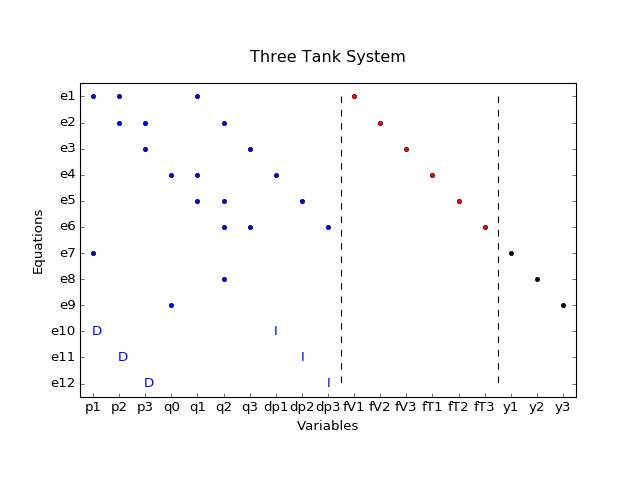

In [4]:
plt.figure(10)
model.PlotModel(verbose=True)
plt.show()

Plot the Dulmage-Mendelsohn decomposition with equivalence class decomposition

<IPython.core.display.Javascript object>


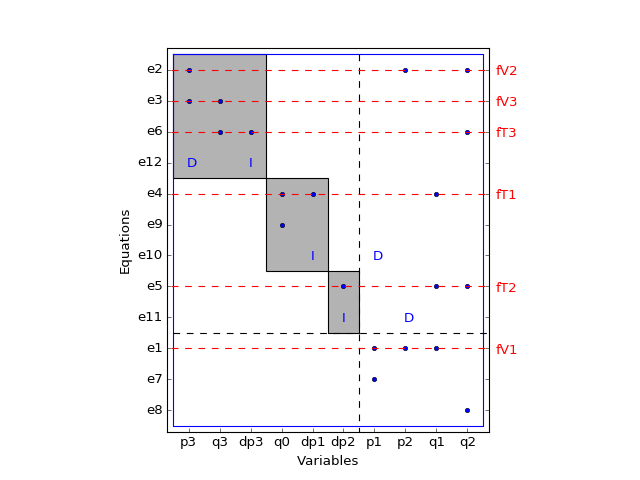

In [5]:
plt.figure(11)
model.PlotDM(eqclass=True,fault=True)
plt.show()

Are the faults detectable?

In [6]:
model.DetectabilityAnalysis()

(['fV1', 'fV2', 'fV3', 'fT1', 'fT2', 'fT3'], [])

What about isolability?

<IPython.core.display.Javascript object>


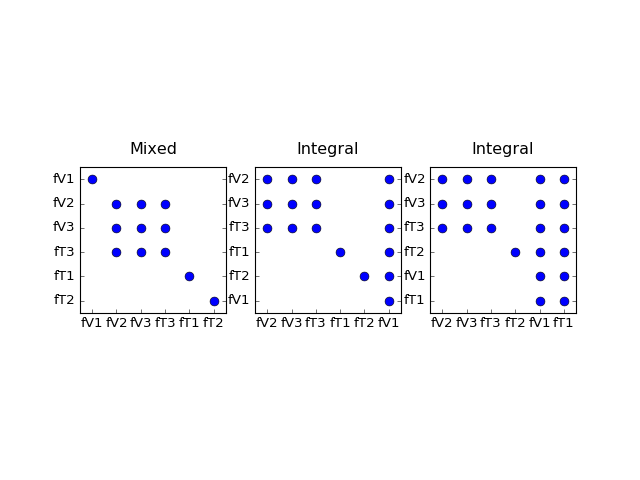

In [7]:
plt.figure(12)
plt.subplot(1,3,1)
model.IsolabilityAnalysis(permute=True,plot=True)
plt.title('Mixed')

plt.subplot(1,3,2)
im = model.IsolabilityAnalysis(permute=True,plot=True, causality='int')
plt.title('Integral')

plt.subplot(1,3,3)
im = model.IsolabilityAnalysis(permute=True,plot=True, causality='der')
plt.title('Integral')
plt.show()

Find the set of MSO sets

In [8]:
print "Searching for MSO sets..."
msos=model.MSO()
print "Found %d mso sets" % len(msos)
print msos

Searching for MSO sets...
Found 6 mso sets
[array([ 7,  6,  4, 10,  3,  8,  9,  1,  2,  5, 11], dtype=int32)
 array([ 7,  6,  4, 10,  3,  8,  9,  0], dtype=int32)
 array([ 7,  6,  4, 10,  1,  2,  5, 11,  0], dtype=int32)
 array([ 7,  6,  3,  8,  9,  1,  2,  5, 11,  0], dtype=int32)
 array([ 7,  4, 10,  3,  8,  9,  1,  2,  5, 11,  0], dtype=int32)
 array([ 6,  4, 10,  3,  8,  9,  1,  2,  5, 11,  0], dtype=int32)]


Determine which MSO sets that are low index

In [9]:
li_msos = map(lambda m: model.IsLowIndex(eq=m), msos)
print li_msos

[False, True, True, True, True, True]


Determine the fault signature matrix for MSO sets

<IPython.core.display.Javascript object>


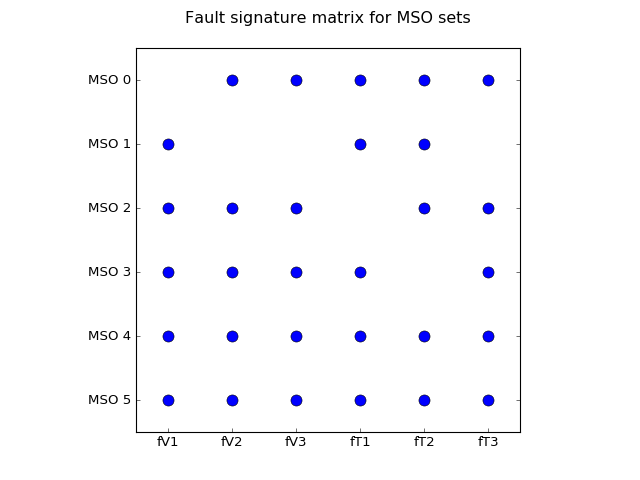

In [30]:
plt.figure(13)
plt.spy(model.FSM(msos), markersize=10, marker='o')
plt.xticks(np.arange(0,model.nf()),model.f)
plt.yticks(np.arange(0,model.nf()), ["MSO "+str(k) for k in np.arange(0,len(msos))])
plt.gca().xaxis.tick_bottom()
plt.title('Fault signature matrix for MSO sets')
plt.show()